### Object Similarity Model Testing

By Zobe Murray in collaboration with Dr. Yanxia Wu and Dr. Doug Addleman

VGG16 Model

* 16 weight layers
* convolutional layers -> max pooling layers -> fully connected layers
* trained on ImageNet
* takes in 224x224 RGB images is the default input this model accepts grayscale as default

Code adapted from: https://github.com/SavinRazvan/image-similarity/blob/main/image_similarity.ipynb

Importing the libraries

In [5]:
!pip install open-clip-torch scipy
!pip install opencv-python
!pip install "numpy<2"
# Import libraries
import cv2
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import open_clip
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 4.1 MB/s eta 0:00:04
    --------------------------------------- 0.3/15.5 MB 3.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/15.5 MB 4.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/15.5 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/15.5 MB 4.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.5 MB 5.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.5 MB 5.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.5 MB 5.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/15.5 MB 6.0 MB/s eta 0:00:03
   --

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\zobes\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import seaborn as sns
import math
import os
from tensorflow.keras.applications.vgg16 import decode_predictions

: 

Converting image into greyscale

In [ ]:
def convert_to_greyscale(image):
  greyscale_img = image.convert('L')
  greyscale_img.show()
  return greyscale_img

In [ ]:
def process_images(file_path):
  """
  Goes through all images in a folder and converts them to greyscale.
  """
  for filename in os.listdir(file_path):
    if filename.endswith(".jpg"):
      image_path = os.path.join(file_path, filename)
      img = Image.open(image_path)
      greyscale_img = convert_to_greyscale(img)
      greyscale_img.save(os.path.join(file_path, f"grey_{filename}")) #saving greysale images

Loading and processing the input image

In [ ]:
def load_image(image, target_size=(224, 224), color_mode='grayscale'):
  """
  Function to load and preprocess the input image.
  """
  img = load_img(image, target_size=target_size, color_mode=color_mode) #loading image and shaping it into VGG16 input size
  img_data = img_to_array(img) #converting image into array
  if color_mode == 'grayscale':
    img_data = np.repeat(img_data, 3, axis=2)
  img_data = np.expand_dims(img_data, axis=0) #expanding dimension of batch bc VGG16 expects 4D input
  img_data = preprocess_input(img_data)
  return img, img_data #returns og image and preprocessed array

Extracting image features

In [ ]:
def extract_features(image_data):
  """
  Function to extract features from the input image using the VGG16 model.
  """
  base_model = VGG16(weights='imagenet') #loading the VGG16 model with pretrained ImageNet weights
  model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output) #new model that outputs features from fc1 layer
  features = model.predict(image_data)
  return features.flatten() #flattening results from 2D to a 1D vector for similarity comparison

Calculating the similarity of two images based on consine similarity

In [ ]:
def calculate_similarity(image1, image2):
  """
  Function to calculate the similarity between two images using cosine similarity.
  """
  similarity = cosine_similarity(image1.reshape(1, -1), image2.reshape(1, -1))[0][0]
  return similarity

Comparing multiple images

In [ ]:
def comparing_imgs(image_paths, color_mode='grayscale'):
  """
  Function to compare the similarity of multiple images.
  """
  img_features = []
  img_similarities = []
  for i in range(len(image_paths)):
    img, img_data = load_image(image_paths[i], color_mode=color_mode)
    img_features.append(extract_features(img_data))
  for i in range(len(img_features)):
    for j in range(i+1, len(img_features)):
      similarity = calculate_similarity(img_features[i], img_features[j])
      img_similarities.append((image_paths[i], image_paths[j], similarity))
  return img_similarities


In [ ]:
def display_similarities(similarities):
  """
  Function to display the similarities between images.
  """
  for sim in similarities:
    print(f"The similarity between {sim[0]} and {sim[1]} is: {sim[2]}")

Visualizing the results

In [ ]:
def display_similarity_heatmap(similarities, image_paths):
  """
  Function to display a heatmap of the similarities between images.
  """
  matrix = pd.DataFrame(data=np.zeros((len(image_paths), len(image_paths))),
                        index=image_paths, columns=image_paths)
  for img1, img2, score in similarities:
    matrix.loc[img1, img2] = score
    matrix.loc[img2, img1] = score
  np.fill_diagonal(matrix.values, 1.0)
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrix, annot=True, fmt=".2f", cmap='viridis')
  plt.title('Similarity Heatmap')
  plt.show()

In [ ]:
def display_images(image_paths):
  """
  Function to display the input images.
  """
  rows = math.ceil(len(image_paths) / 4)
  plt.figure(figsize=(5, 5 * rows))
  for index, path in enumerate(image_paths):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, 4, index + 1)
    plt.imshow(img)
    plt.title(path.split('/')[-1])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

Full model predictions

In [ ]:
def classifying_images(image_paths, color_mode='grayscale'):
  """
  Function to classify the input images.
  """
  base_model = VGG16(weights='imagenet') #loading the VGG16 model with pretrained ImageNet weights
  predictions = []
  for path in image_paths:
    img, img_data = load_image(path, color_mode=color_mode)
    img_predictions = base_model.predict(img_data) # Use a different variable name for the prediction result
    decoded_predictions = decode_predictions(img_predictions, top=1)[0]
    predictions.append(decoded_predictions)
  return predictions

Going through images, converting them to grey, and saving them

In [ ]:
process_images("/content")

Getting stats from multiple grey images

In [ ]:
image_paths = ["grey_obj1a.jpg", "grey_obj1b.jpg", "grey_obj1c.jpg", "grey_obj1d.jpg", "grey_obj1e.jpg", "grey_obj1f.jpg", "grey_obj1g.jpg", "grey_obj1h.jpg", "grey_obj1i.jpg", "grey_obj1j.jpg", "grey_obj1k.jpg", "grey_obj1l.jpg",
               "grey_obj2a.jpg", "grey_obj2b.jpg", "grey_obj2c.jpg", "grey_obj2d.jpg", "grey_obj2e.jpg", "grey_obj2f.jpg", "grey_obj2g.jpg", "grey_obj2h.jpg", "grey_obj2i.jpg", "grey_obj2j.jpg", "grey_obj2k.jpg", "grey_obj2l.jpg",
               "grey_obj3a.jpg", "grey_obj3b.jpg", "grey_obj3c.jpg", "grey_obj3d.jpg", "grey_obj3e.jpg", "grey_obj3f.jpg", "grey_obj3g.jpg", "grey_obj3h.jpg", "grey_obj3i.jpg", "grey_obj3j.jpg", "grey_obj3k.jpg", "grey_obj3l.jpg",
               "grey_obj4a.jpg", "grey_obj4b.jpg", "grey_obj4c.jpg", "grey_obj4d.jpg", "grey_obj4e.jpg", "grey_obj4f.jpg", "grey_obj4g.jpg", "grey_obj4h.jpg", "grey_obj4i.jpg", "grey_obj4j.jpg", "grey_obj4k.jpg", "grey_obj4l.jpg",
               "grey_obj5a.jpg", "grey_obj5b.jpg", "grey_obj5c.jpg", "grey_obj5d.jpg", "grey_obj5e.jpg", "grey_obj5f.jpg", "grey_obj5g.jpg", "grey_obj5h.jpg", "grey_obj5i.jpg", "grey_obj5j.jpg", "grey_obj5k.jpg", "grey_obj5l.jpg",
               "grey_obj6a.jpg", "grey_obj6b.jpg", "grey_obj6c.jpg", "grey_obj6d.jpg", "grey_obj6e.jpg", "grey_obj6f.jpg", "grey_obj6g.jpg", "grey_obj6h.jpg", "grey_obj6i.jpg", "grey_obj6j.jpg", "grey_obj6k.jpg", "grey_obj6l.jpg",
               "grey_obj7a.jpg", "grey_obj7b.jpg", "grey_obj7c.jpg", "grey_obj7d.jpg", "grey_obj7e.jpg", "grey_obj7f.jpg", "grey_obj7g.jpg", "grey_obj7h.jpg", "grey_obj7i.jpg", "grey_obj7j.jpg", "grey_obj7k.jpg", "grey_obj7l.jpg",
               "grey_obj8a.jpg", "grey_obj8b.jpg", "grey_obj8c.jpg", "grey_obj8d.jpg", "grey_obj8e.jpg", "grey_obj8f.jpg", "grey_obj8g.jpg", "grey_obj8h.jpg", "grey_obj8i.jpg", "grey_obj8j.jpg", "grey_obj8k.jpg", "grey_obj8l.jpg"]
similarities = comparing_imgs(image_paths)
display_similarities(similarities)
display_images(image_paths)
display_similarity_heatmap(similarities, image_paths)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/ste

Similarity heatmap for color images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The similarity between obj1b.jpg and obj1c.jpg is: 0.47596365213394165
The similarity between obj1b.jpg and obj2a.jpg is: 0.23604294657707214
The similarity between obj1b.jpg and obj2b.jpg is: 0.2420623004436493
The similarity between obj1b.jpg and obj3a.jpg is: 0.2793077230453491
The similarity between obj1b.jpg and obj3b.jpg is: 0.25513988733291626
The similarity between obj1c.jpg and obj2a.jpg is: 0.1710910201072693
The similarity between obj1c.jpg and obj2b.jpg is: 0.11158064752817154
The similarity between obj1c.jpg and obj3a.jpg is: 0.25509756803512573
The similarity between obj1c.jpg and obj3b.jpg is: 0.32510724663734436
The similarity between obj2a.jpg and obj2b.jpg is: 0.4596046507358551
The similarity between obj2a.jpg and obj3a.jpg is: 0.3115217685699

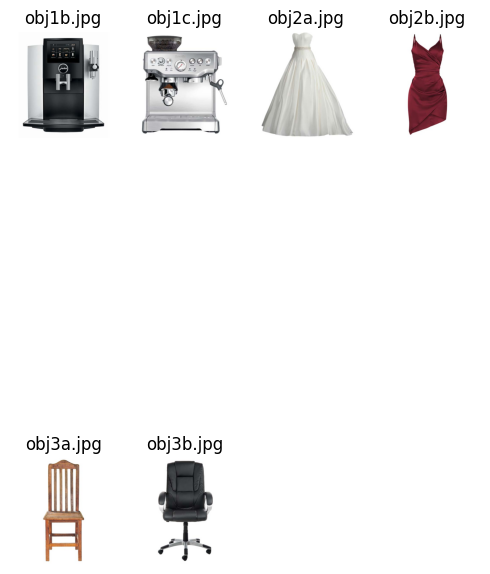

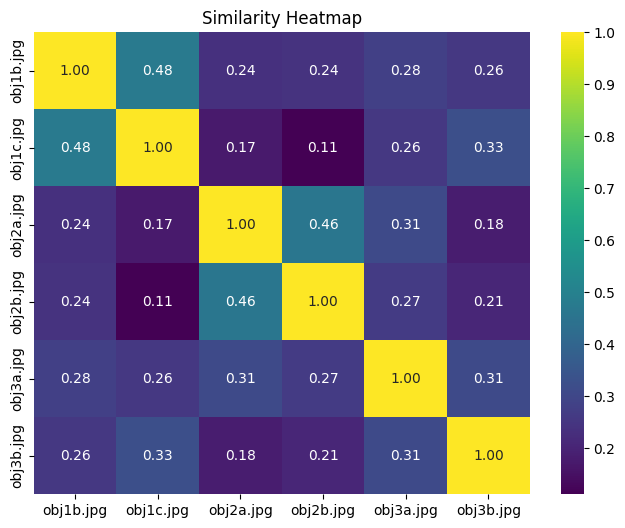

In [ ]:
image_paths = ["obj1b.jpg", "obj1c.jpg", "obj2a.jpg", "obj2b.jpg", "obj3a.jpg", "obj3b.jpg"]
similarities = comparing_imgs(image_paths, color_mode='rgb')
display_similarities(similarities)
display_images(image_paths)
display_similarity_heatmap(similarities, image_paths)

Viewing classification predictions from model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


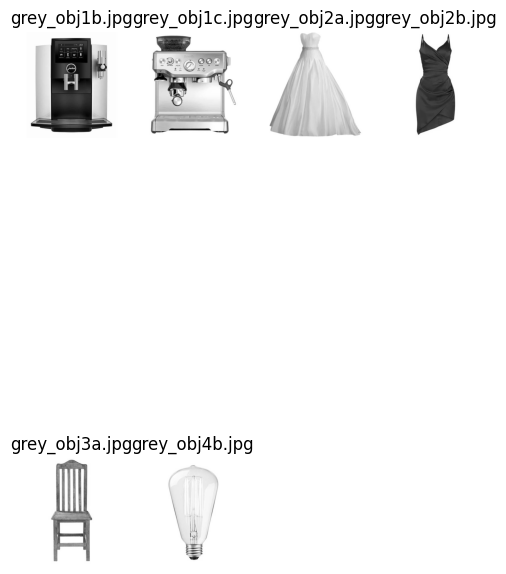

Prediction for grey_obj1b.jpg: espresso_maker, Confidence: 0.9071633219718933
Prediction for grey_obj1c.jpg: espresso_maker, Confidence: 0.998950719833374
Prediction for grey_obj2a.jpg: hoopskirt, Confidence: 0.47044676542282104
Prediction for grey_obj2b.jpg: mortarboard, Confidence: 0.1700707972049713
Prediction for grey_obj3a.jpg: rocking_chair, Confidence: 0.4943704903125763
Prediction for grey_obj4b.jpg: spotlight, Confidence: 0.18438582122325897


In [ ]:
image_paths = ["grey_obj1b.jpg", "grey_obj1c.jpg", "grey_obj2a.jpg", "grey_obj2b.jpg", "grey_obj3a.jpg", "grey_obj4b.jpg"]
predictions = classifying_images(image_paths, color_mode='grayscale')
display_images(image_paths)
for i, prediction in enumerate(predictions):
  print(f"Prediction for {image_paths[i]}: {prediction[0][1]}, Confidence: {prediction[0][2]}")